In [1]:
import sys, os
# Uncomment the line below if you want to run on CPU
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import pandas as pd
#from train_models import train_pgbm_dengue, apply_dengue_pgbm_on_chik, train_pgbm_chik
from train_models import train_dl_model, train_transf_chik
from train_models import LOOK_BACK, PREDICT_N
from train_models import train_pgbm_model, apply_dengue_pgbm_on_chik
sys.path.append('../')
from lstm import apply_model
from pgbm_model import pgbm_pred

In [2]:
df = pd.read_csv('selected_cities.csv', index_col = 'Unnamed: 0')
df.head()

,geocode,state,sum_cases,POP22,inc,n_last_ep,year_first_ep,year_last_ep_before_2023,region,region_codes,start_train_chik,end_train_chik
0,2211001,PI,2325,868523,267.695847,4,2015,2022,ne,1,2014-10-01,2022-11-01
1,2913606,BA,1858,197163,942.367483,2,2015,2016,ne,1,2014-10-01,2016-11-01
2,2914802,BA,1846,185500,995.148248,2,2016,2022,ne,1,2015-10-01,2022-11-01
3,2111300,MA,1788,1061374,168.460882,2,2016,2022,ne,1,2015-10-01,2022-11-01
4,2925303,BA,1687,158736,1062.770890,2,2016,2017,ne,1,2015-10-01,2017-11-01


In [3]:

city = 2802106
df = df.loc[df.geocode == city]
state = df.state
INI_DATE = df.start_train_chik.values[0]
END_DATE_TRAIN = df.end_train_chik.values[0]
END_DATE = '2023-11-01'

In [4]:
print('INI_DATE:', INI_DATE)
print('END_DATE_TRAIN:', END_DATE_TRAIN)

INI_DATE: 2014-10-01
END_DATE_TRAIN: 2021-11-01


### Train the dengue DL model:

Compilation Time :  0.0027899742126464844
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 206)]         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 12, 8)            13760     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 8)             0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 8)             544       
                                                                 
 dropout_2 (Dropout)         (None, 12, 8)             0         
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                   

2024-01-23 09:56:08.819321: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-01-23 09:56:08.852571: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1780] (One-time warning): Not using XLA:CPU for cluster.

If you want XLA:CPU, do one of the following:

 - set the TF_XLA_FLAGS to include "--tf_xla_cpu_global_jit", or
 - set cpu_global_jit to true on this session's OptimizerOptions, or
 - use experimental_jit_scope, or
 - use tf.function(jit_compile=True).

To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a
proper command-line flag, not via TF_XLA_FLAGS).


450/450 [==============================] - 4s 5ms/step - loss: 0.0296 - accuracy: 0.3067 - mape: 4473833.0000 - mse: 0.0290 - val_loss: 0.0249 - val_accuracy: 0.3046 - val_mape: 10073714.0000 - val_mse: 0.0248
Epoch 2/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0244 - accuracy: 0.2600 - mape: 10551177.0000 - mse: 0.0263 - val_loss: 0.0219 - val_accuracy: 0.2781 - val_mape: 15518154.0000 - val_mse: 0.0242
Epoch 3/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0217 - accuracy: 0.2467 - mape: 11502574.0000 - mse: 0.0254 - val_loss: 0.0193 - val_accuracy: 0.2848 - val_mape: 8746380.0000 - val_mse: 0.0230
Epoch 4/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0191 - accuracy: 0.2489 - mape: 9320244.0000 - mse: 0.0234 - val_loss: 0.0177 - val_accuracy: 0.1921 - val_mape: 5945017.5000 - val_mse: 0.0219
Epoch 5/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0156 - accuracy: 0.2244 - mape: 9541539.0000 - 

Epoch 38/400
450/450 [==============================] - 2s 4ms/step - loss: 0.0079 - accuracy: 0.2444 - mape: 5781025.0000 - mse: 0.0094 - val_loss: 0.0078 - val_accuracy: 0.2185 - val_mape: 7012022.0000 - val_mse: 0.0094
Epoch 39/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0079 - accuracy: 0.2089 - mape: 6574637.0000 - mse: 0.0097 - val_loss: 0.0072 - val_accuracy: 0.2252 - val_mape: 4855270.5000 - val_mse: 0.0081
Epoch 40/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0073 - accuracy: 0.1933 - mape: 5450870.5000 - mse: 0.0082 - val_loss: 0.0073 - val_accuracy: 0.2517 - val_mape: 6336743.0000 - val_mse: 0.0085
Epoch 41/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0071 - accuracy: 0.2422 - mape: 6270411.5000 - mse: 0.0082 - val_loss: 0.0083 - val_accuracy: 0.1921 - val_mape: 10817113.0000 - val_mse: 0.0098
Epoch 42/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0074 - accuracy: 0.2178 - mape: 5

Epoch 75/400
450/450 [==============================] - 2s 4ms/step - loss: 0.0060 - accuracy: 0.2289 - mape: 5485386.5000 - mse: 0.0072 - val_loss: 0.0060 - val_accuracy: 0.2715 - val_mape: 5234928.0000 - val_mse: 0.0073
Epoch 76/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0063 - accuracy: 0.2422 - mape: 5604336.5000 - mse: 0.0077 - val_loss: 0.0076 - val_accuracy: 0.2980 - val_mape: 4880161.5000 - val_mse: 0.0100
Epoch 77/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0058 - accuracy: 0.2067 - mape: 6068421.5000 - mse: 0.0069 - val_loss: 0.0056 - val_accuracy: 0.1722 - val_mape: 6861909.0000 - val_mse: 0.0064
Epoch 78/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0068 - accuracy: 0.2267 - mape: 5838694.5000 - mse: 0.0087 - val_loss: 0.0061 - val_accuracy: 0.2450 - val_mape: 6112870.5000 - val_mse: 0.0075
Epoch 79/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0056 - accuracy: 0.2444 - mape: 52

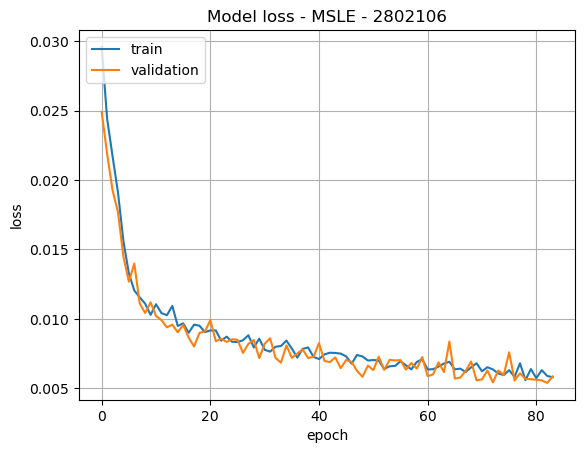

CPU times: user 3min 6s, sys: 13.9 s, total: 3min 19s
Wall time: 2min 18s


In [5]:
%%time 
train_dl_model(city,   doenca = 'dengue', end_date_train = END_DATE_TRAIN , end_date = END_DATE)
    

### Function to apply dengue model on dengue data: 

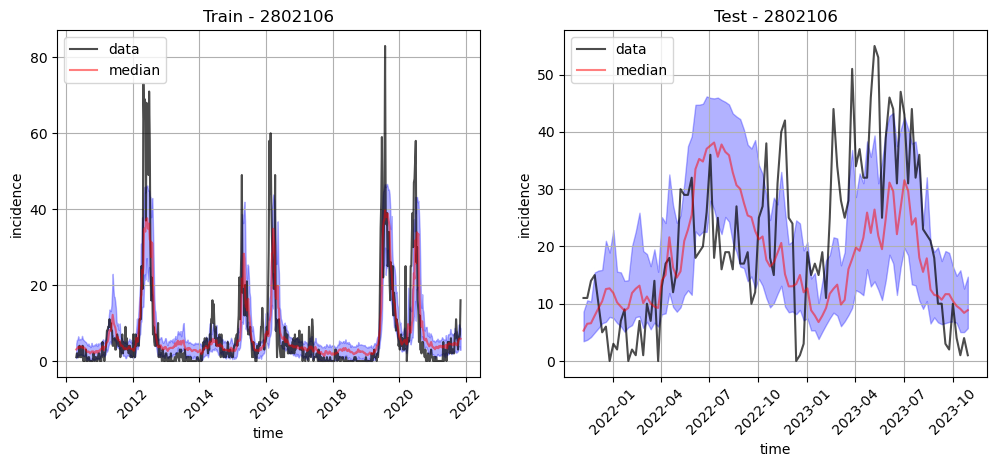

CPU times: user 1min 38s, sys: 6.11 s, total: 1min 44s
Wall time: 1min 11s


In [7]:
%%time 
# apply NN model 
metrics = apply_model(city, ini_date = None, 
                    end_date = END_DATE, look_back = LOOK_BACK, end_train_date =  END_DATE_TRAIN, batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= 'dengue_pred',
                    model_name = f'trained_{city}_dengue_msle', 
                    filename = f'../data/dengue_{city}_cluster.csv.gz')
    

### Apply this dengue DL model on chik data: 

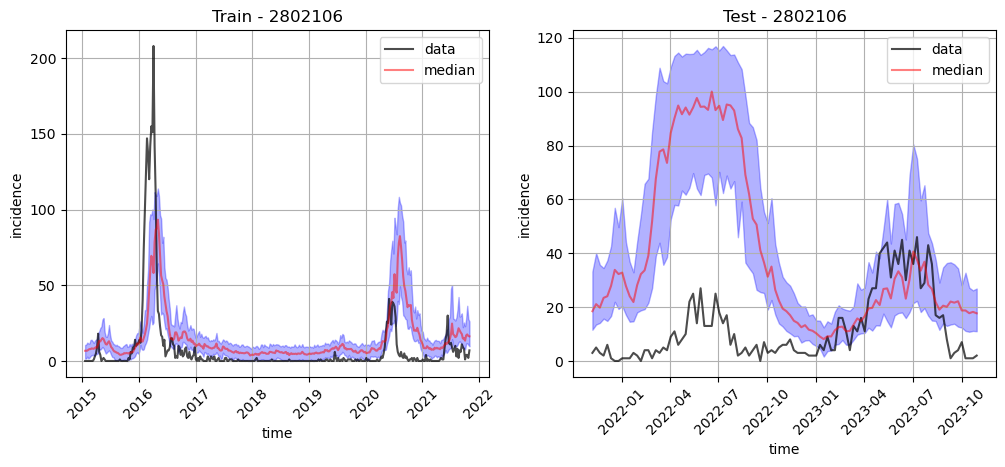

CPU times: user 1min 5s, sys: 4.15 s, total: 1min 9s
Wall time: 48.1 s


In [8]:
%%time 

# apply NN model 
metrics = apply_model(city, ini_date = INI_DATE, 
                    end_date = END_DATE, look_back = LOOK_BACK, end_train_date =  END_DATE_TRAIN, batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= 'chik_dengue_pred',
                    model_name = f'trained_{city}_dengue_msle', 
                    filename = f'../data/chik_{city}_cluster.csv.gz', plot = True)

## Apply the transfer: 

Compilation Time :  0.0032622814178466797
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12, 206)]         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 12, 8)            13760     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 8)             0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 8)             544       
                                                                 
 dropout_2 (Dropout)         (None, 12, 8)             0         
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                 

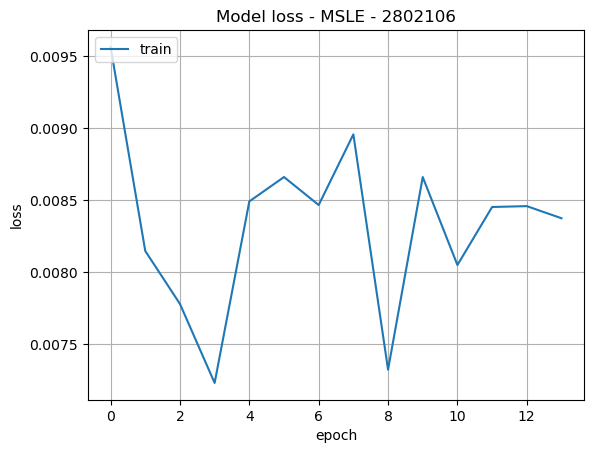

CPU times: user 12.4 s, sys: 1.28 s, total: 13.7 s
Wall time: 10.3 s


In [9]:
%%time 

train_transf_chik(city, ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)

Apply the transfer model:

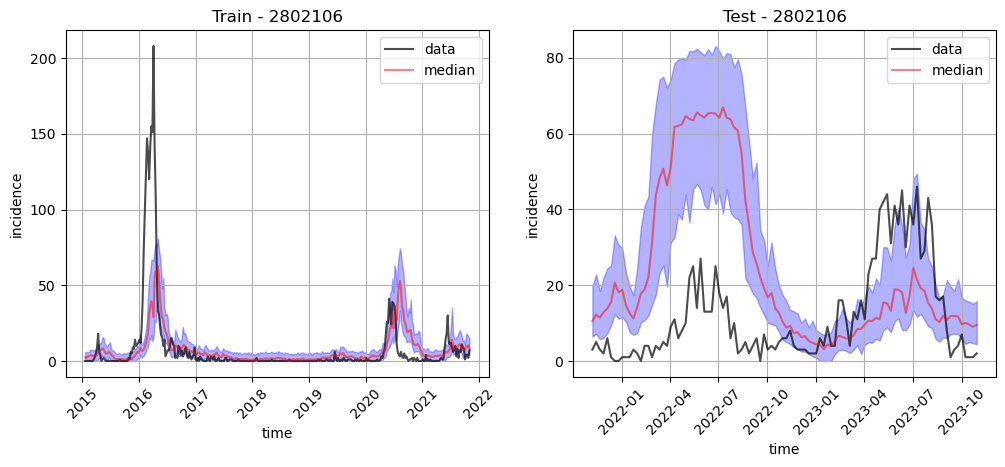

In [10]:
metrics = apply_model(city, ini_date = INI_DATE, 
                    end_date = END_DATE, look_back = LOOK_BACK, end_train_date =  END_DATE_TRAIN, batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= 'chik_transf_pred',
                    model_name = f'trained_{city}_chik_transf_msle', 
                    filename = f'../data/chik_{city}_cluster.csv.gz', plot = True)

### Train the chik DL model:

Compilation Time :  0.004987955093383789
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 12, 206)]         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 12, 8)            13760     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 8)             0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 8)             544       
                                                                 
 dropout_2 (Dropout)         (None, 12, 8)             0         
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                  

Epoch 31/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0033 - accuracy: 0.4733 - mape: 3052699.0000 - mse: 0.0024 - val_loss: 0.0063 - val_accuracy: 0.6026 - val_mape: 791470.0625 - val_mse: 0.0075
Epoch 32/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0033 - accuracy: 0.4600 - mape: 3249676.2500 - mse: 0.0025 - val_loss: 0.0042 - val_accuracy: 0.3245 - val_mape: 7020469.5000 - val_mse: 0.0042
Epoch 33/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0034 - accuracy: 0.4644 - mape: 3466525.0000 - mse: 0.0027 - val_loss: 0.0054 - val_accuracy: 0.5166 - val_mape: 1908536.6250 - val_mse: 0.0060
Epoch 34/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0033 - accuracy: 0.4756 - mape: 3572208.7500 - mse: 0.0025 - val_loss: 0.0040 - val_accuracy: 0.4570 - val_mape: 3643657.7500 - val_mse: 0.0039
Epoch 35/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0036 - accuracy: 0.5044 - mape: 273

Epoch 68/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0027 - accuracy: 0.5311 - mape: 3451959.2500 - mse: 0.0023 - val_loss: 0.0025 - val_accuracy: 0.5099 - val_mape: 2496216.2500 - val_mse: 0.0021
Epoch 69/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0024 - accuracy: 0.5511 - mape: 2764762.0000 - mse: 0.0018 - val_loss: 0.0026 - val_accuracy: 0.5430 - val_mape: 1614795.2500 - val_mse: 0.0023
Epoch 70/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0023 - accuracy: 0.5533 - mape: 2322626.7500 - mse: 0.0016 - val_loss: 0.0031 - val_accuracy: 0.4901 - val_mape: 2252690.5000 - val_mse: 0.0031
Epoch 71/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0024 - accuracy: 0.5467 - mape: 3373032.5000 - mse: 0.0017 - val_loss: 0.0026 - val_accuracy: 0.5894 - val_mape: 1420377.0000 - val_mse: 0.0022
Epoch 72/400
450/450 [==============================] - 2s 3ms/step - loss: 0.0024 - accuracy: 0.5644 - mape: 24

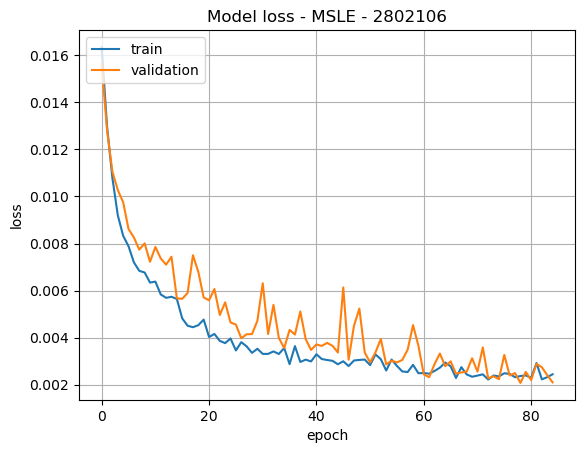

CPU times: user 3min 4s, sys: 13.1 s, total: 3min 17s
Wall time: 2min 15s


In [11]:
%%time 

train_dl_model(city,   doenca = 'chik', end_date_train = END_DATE_TRAIN , end_date = END_DATE)
    
    

### Apply the DL chik model on chik data

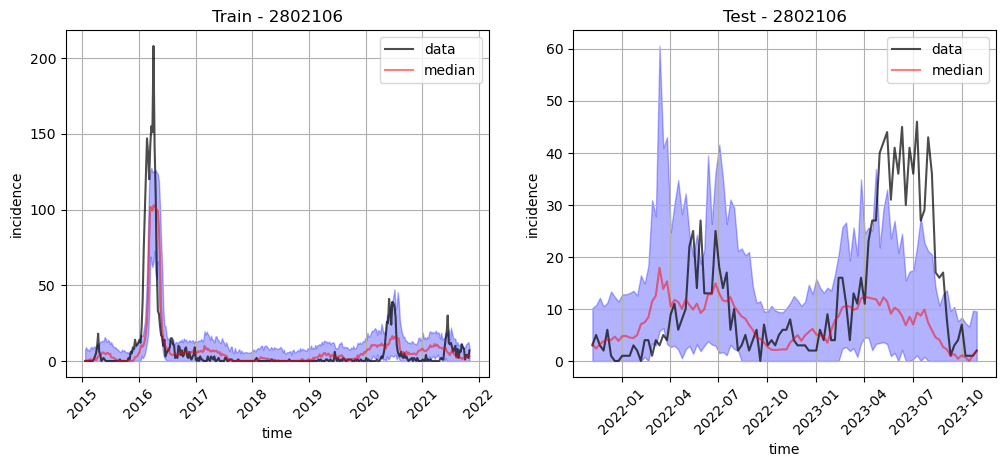

CPU times: user 1min 6s, sys: 4.23 s, total: 1min 10s
Wall time: 47.9 s


In [12]:
%%time 
metrics = apply_model(city, ini_date = INI_DATE, 
                    end_date = END_DATE, look_back = LOOK_BACK, end_train_date =  END_DATE_TRAIN, batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= 'chik_pred',
                    model_name = f'trained_{city}_chik_msle', 
                    filename = f'../data/chik_{city}_cluster.csv.gz', plot = True)

### Train the dengue pgbm model 

In [13]:
%%time
train_pgbm_model(city, 'dengue', ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)



CPU times: user 2min 14s, sys: 1min 1s, total: 3min 16s
Wall time: 30.4 s


### Apply the dengue pgbm on dengue data

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


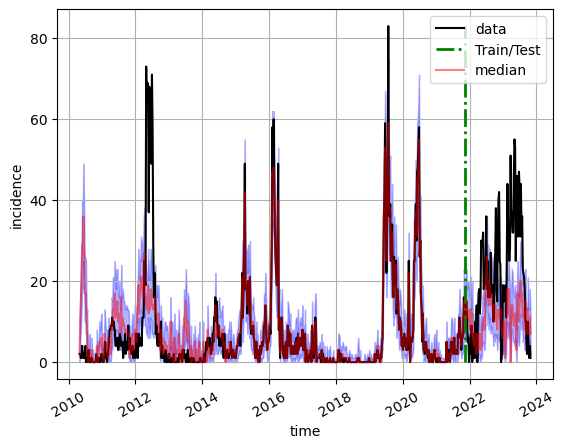

CPU times: user 8.26 s, sys: 2.63 s, total: 10.9 s
Wall time: 3.23 s


In [14]:
%%time
pgbm_pred(city, PREDICT_N, LOOK_BACK, doenca = 'dengue', ratio = 0.75, ini_date = None, 
                  end_train_date = END_DATE_TRAIN, end_date = END_DATE,
                  filename =  f'../data/dengue_{city}_cluster.csv.gz', plot = True)

### Apply the dengue pgbm model on chik:

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


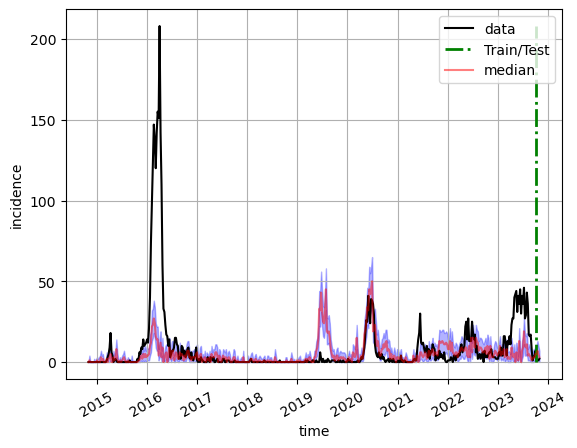

In [15]:
apply_dengue_pgbm_on_chik(city, ini_date= INI_DATE, end_date = END_DATE)

### Train the chik PGBM model:

In [16]:
%%time
train_pgbm_model(city, 'chik', ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)



CPU times: user 2min 26s, sys: 1min 6s, total: 3min 33s
Wall time: 31 s


/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


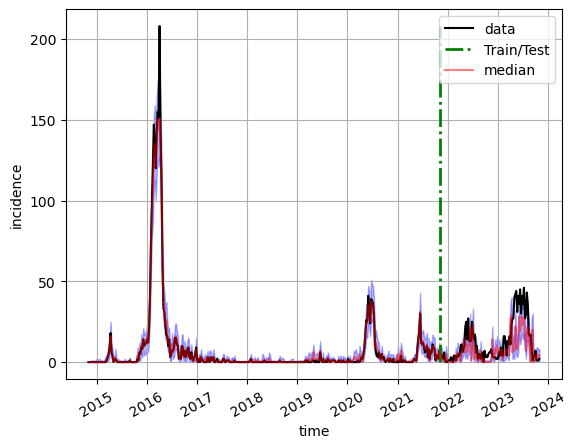

CPU times: user 6.45 s, sys: 2 s, total: 8.45 s
Wall time: 2.22 s


In [17]:
%%time
pgbm_pred(city, PREDICT_N, LOOK_BACK, doenca = 'chik', ratio = 0.75, ini_date = INI_DATE, 
                  end_train_date = END_DATE_TRAIN, end_date = END_DATE,
                  filename =  f'../data/chik_{city}_cluster.csv.gz')